## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isna().sum()#смотрим пропущенные значения - их нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
X.dtypes#смотрим, есть ли категориальные или порядковые - нет, все числовые 

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
df = pd.DataFrame(data['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler() # min, max
X_norm = normalizer.fit_transform(X.values) # np.array
X = pd.DataFrame(X_norm, columns = data['feature_names'])
X#нормализованные данные

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
168,0.671053,0.363636,0.711230,0.716495,0.380435,0.196552,0.105485,0.490566,0.356467,0.629693,0.211382,0.194139,0.336662
102,0.344737,0.337945,0.588235,0.536082,0.304348,0.544828,0.373418,0.396226,0.283912,0.129693,0.260163,0.772894,0.114123
162,0.478947,0.500000,0.652406,0.587629,0.391304,0.231034,0.054852,0.886792,0.173502,0.366894,0.317073,0.307692,0.208274
119,0.255263,0.531621,0.342246,0.432990,0.184783,0.351724,0.274262,0.452830,0.460568,0.000000,0.365854,0.652015,0.203994
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
73,0.515789,0.183794,0.663102,1.000000,0.750000,0.800000,0.537975,0.150943,0.488959,0.176621,0.674797,0.816850,0.504280
144,0.321053,0.620553,0.449198,0.407216,0.456522,0.137931,0.092827,0.301887,0.230284,0.591297,0.138211,0.267399,0.411555
118,0.457895,0.531621,0.331551,0.278351,0.108696,0.224138,0.191983,0.566038,0.132492,0.180887,0.178862,0.311355,0.067047


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# классификатор
from sklearn.neighbors import KNeighborsClassifier

### ПРИМЕР ВЫВОДА ###
NN 	 Train 	 Test
1 	 1.0 	 0.56
3 	 0.83 	 0.61
5 	 0.81 	 0.63
10 	 0.79 	 0.54
15 	 0.74 	 0.57
25 	 0.76 	 0.56


In [19]:
#список для задания 1.5
clfs = []
#евклидово расстояние по умолчанию
print("NN\tTrain\tTest")
for i in (1,3,5,10,15,25):
  clf = KNeighborsClassifier(n_neighbors=i)#задаем число соседей
  clfs.append(clf.fit(X_train[['alcohol','magnesium']], y_train))#обучение на 2 признаках
  y_predicted = clf.predict(X_train[['alcohol','magnesium']])#предсказание
  as_train = accuracy_score(y_train, y_predicted)  
  y_predicted = clf.predict(X_test[['alcohol','magnesium']])#предсказание
  as_test = accuracy_score(y_test, y_predicted) 
  print(f"{i}\t{round(as_train,2)}\t{round(as_test,2)}")

NN	Train	Test
1	0.99	0.72
3	0.83	0.74
5	0.79	0.74
10	0.76	0.76
15	0.78	0.74
25	0.73	0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
!pip install mlxtend==0.19.00

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

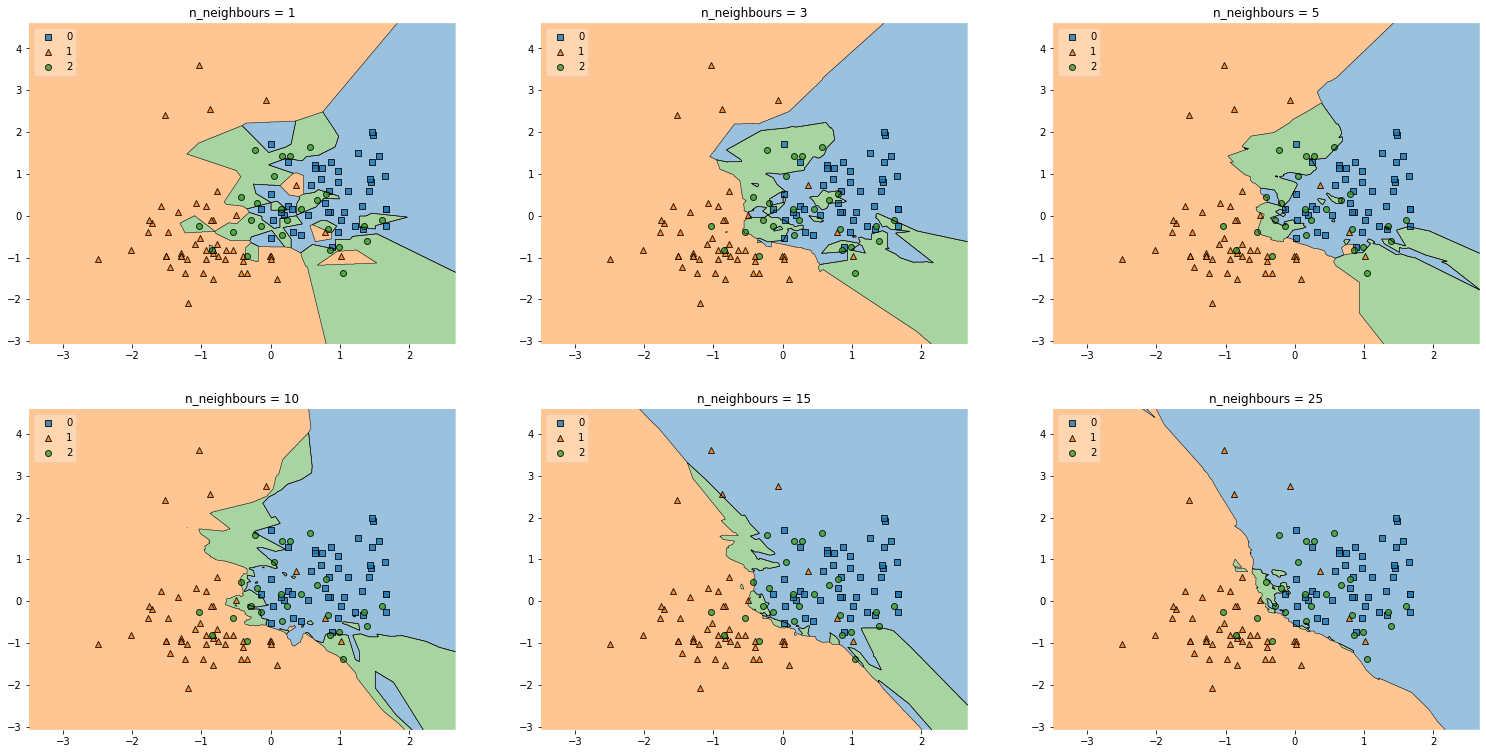

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have v

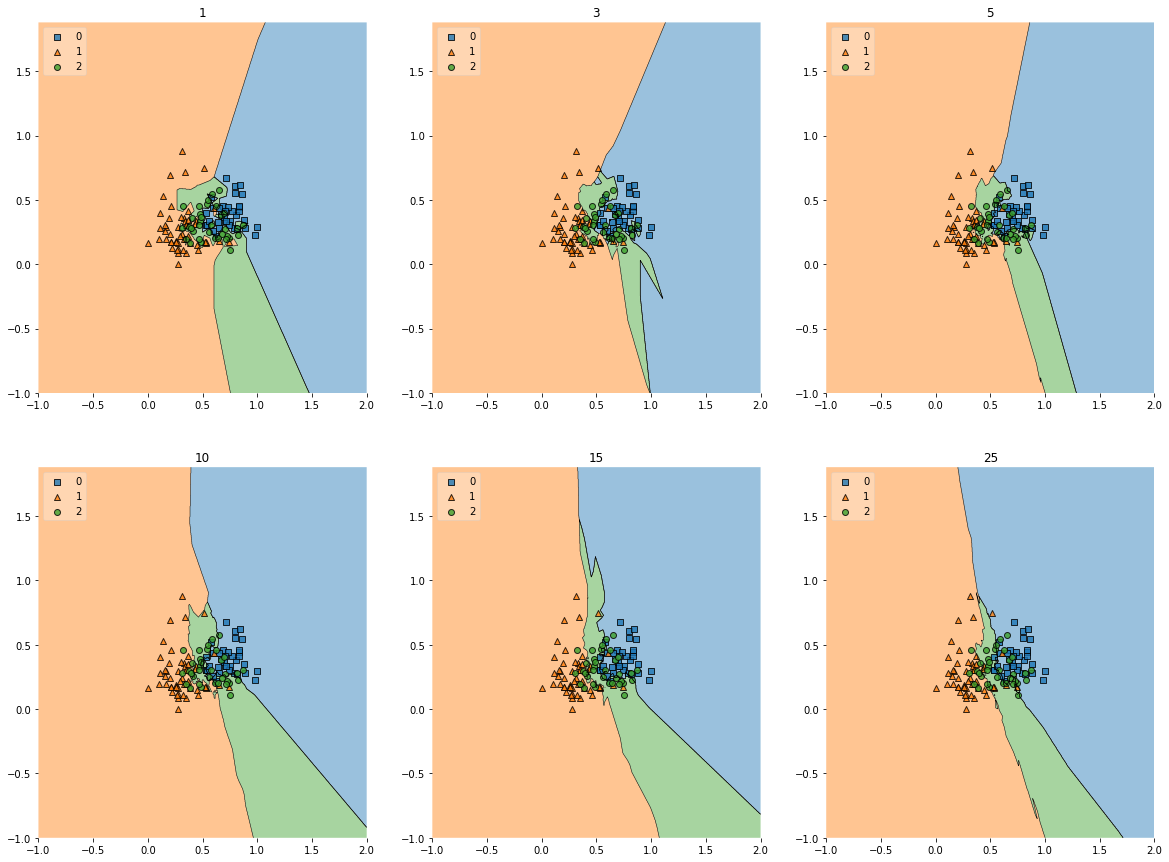

In [30]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,15))

labels = [1,3,5,10,15,25]
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[['alcohol','magnesium']].values, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
"""
в задании 1.3 самый лучший результат получился у метода 1 ближайшего соседа на трейне, так как обучение knn предполагает запоминание обучающей выборки.
если смотреть и трейн, и тест, то наиболее оптимальным вариантом является 10 ближайших соседей. Доля верных ответов на тесте максимально. 
По построенной решающей поверхности видно, что нет переобучения, как на числах поменьше, и не слишком размытые границы, как на числах больше. 

"""

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

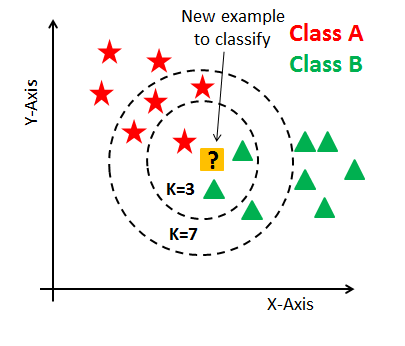

In [34]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):#обучение - сохраняем обучающую выборку
      self.Xtrain = X
      self.ytrain = y
      pass
    
    def predict(self, X):
      import numpy as np
      import statistics as st
      self.Xtest = X
      mas = []#массив ответов  
      for row in self.Xtest:#для каждого объекта (строки теста) ищем
        distances = np.linalg.norm(self.Xtrain - row, axis=1)#вектор расстояний до текущей точки      
        nearest_neighbor_ids = distances.argsort()[:self.k]#сортируем по возрастанию и берем первые k строк
        class_neighbors = self.ytrain[nearest_neighbor_ids]#сохраняем целевую переменную найденных строк(ближайших k соседей)
        mas.append(st.mode(class_neighbors))#берем в качестве ответа моду среди целевых переменных(самое часто встречающееся значение)
      return np.array(mas)#отправляем ответ
      pass

In [32]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [35]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [39]:
data.info()#пропусков нет, все числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [59]:
#unnamed - просто индексы, которые можно удалять, потому что доп информацию не несут
data = data.drop(['Unnamed: 0'], axis=1)
data
#по сути, можно было бы удалить и depth,	table, так как очень похоже на дублирование, если учитывать, что у нас есть x,y,z, 
#а эти столбцы лишь результат манипуляции с ними
#но по сравнению с первым столбцом - эти хотя бы имеют смысл

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [51]:
data.corr()
#цена сильно зависит от карата бриллианта, почти пропорционально
#также сильно зависит от величины бриллианта (x,y,z)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [131]:
data.drop('price', 1).corrwith(data["price"]).sort_values(ascending=False)

<ipython-input-131-496235fa5e16>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('price', 1).corrwith(data["price"]).sort_values(ascending=False)


carat            0.921591
x                0.884435
y                0.865421
z                0.861249
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_IF      -0.049596
clarity_VVS2    -0.052381
clarity_VVS1    -0.095266
cut_Ideal       -0.097175
color_E         -0.101089
dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [60]:
data = pd.get_dummies(data, drop_first=True)
data#закодировали 

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [73]:
from sklearn.model_selection import train_test_split
np.random.seed(5)
X = data.drop('price', 1).values
y = data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

<ipython-input-73-b65a60fa3254>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('price', 1).values


array([[ 0.33, 60.9 , 57.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.56, 61.2 , 57.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.52, 63.3 , 58.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 1.6 , 60.3 , 59.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.46, 61.4 , 59.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.41, 63.1 , 64.  , ...,  1.  ,  0.  ,  0.  ]])

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [74]:
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler() # min, max
X_train = normalizer.fit_transform(X_train) # np.array
X_test = normalizer.fit_transform(X_test) # np.array

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression().fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print("Train: {}".format(mean_squared_error(y_train, pred_train)**0.5))
print("Test: {}".format(mean_squared_error(y_test, pred_test)**0.5))

Train: 1129.7918735928931
Test: 1490.4167472334777


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [81]:
pd.DataFrame(abs(lr.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)
#carat, x, clarity, color, depth, table - на порядок превышают оценки прочих вещественных переменных.

<ipython-input-81-cb831e201c46>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pd.DataFrame(abs(lr.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)


,0
carat,54007.214525
x,10422.390259
clarity_IF,5314.484725
clarity_VVS1,5010.646146
clarity_VVS2,4941.054823
clarity_VS1,4576.757612
clarity_VS2,4266.191126
clarity_SI1,3662.841730
clarity_SI2,2685.982771
color_J,2359.564711


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [85]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge(10).fit(X_train, y_train)
pd.DataFrame(abs(ridge.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)
#все признаки уменьшились. с 10тыс упало и до 4(почти в 2 раза)

<ipython-input-85-046fe61315cf>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pd.DataFrame(abs(ridge.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)


,0
carat,35127.200804
clarity_IF,4687.911872
clarity_VVS1,4399.242146
clarity_VVS2,4290.061257
x,4096.904361
clarity_VS1,3859.292769
clarity_VS2,3571.486621
clarity_SI1,2926.154119
z,2315.619466
color_J,2130.452611


In [87]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(10).fit(X_train, y_train)
pd.DataFrame(abs(lasso.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)
#некоторые признаки практически не изменились, а некоторые обнулились (даже признак, который по значимости был 2, стал 0)
#x,y,z,table,depth были были зависимыми
#существовала проблема мультиколлинеарности, которая разрешилась добавлением регуляризатора

<ipython-input-87-ce543494a83e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pd.DataFrame(abs(lasso.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)


,0
carat,40111.759032
color_J,1646.286443
clarity_IF,1326.586770
clarity_VVS1,1188.784150
clarity_VVS2,1184.117301
color_I,918.023831
clarity_VS1,830.260758
clarity_SI2,747.137894
clarity_VS2,598.717468
color_H,531.330631


In [88]:
pred_train = ridge.predict(X_train)
pred_test = ridge.predict(X_test)
#на трейне ошибка возросла, зато упала на тесте
print("Train: {}".format(mean_squared_error(y_train, pred_train)**0.5))
print("Test: {}".format(mean_squared_error(y_test, pred_test)**0.5))

Train: 1199.710829930012
Test: 1238.738443137261


In [91]:
pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)
print("Train: {}".format(mean_squared_error(y_train, pred_train)**0.5))
print("Test: {}".format(mean_squared_error(y_test, pred_test)**0.5))

Train: 1262.9685634679427
Test: 1433.7840754020576


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [97]:
ls = []
rd = []

for alpha in (0.1, 1, 10, 100, 200):
    clf = Lasso(alpha=alpha)
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    ls.append(np.linalg.norm(clf.coef_))

    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    rd.append(np.linalg.norm(clf.coef_))


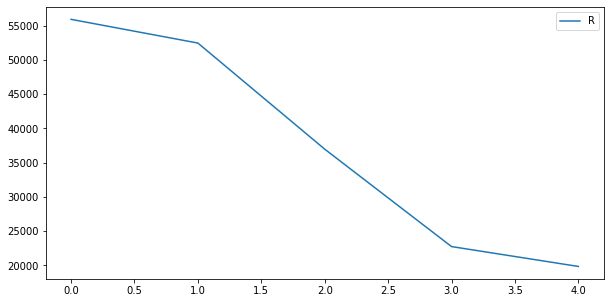

In [106]:
fig = plt.figure(figsize=(10,5))
plt.plot(rd)
plt.legend('Ridge')
plt.show()
#агрессивнее уменьшает веса

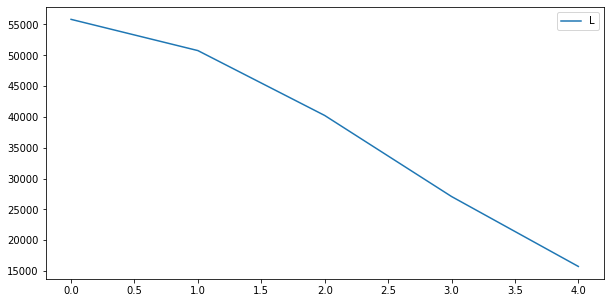

In [104]:
fig = plt.figure(figsize=(10,5))
plt.plot(ls)
plt.legend('Lasso')
plt.show()
#используют, потому что зануляет некоторые признаки, которые можно выкинуть (L1 регуляризатор не зануляет)

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [155]:
from sklearn. linear_model import LassoCV
clf = LassoCV(alphas =[0.1, 1, 10, 100, 200], cv=5)
clf.fit(X_train, y_train) 
clf.mse_path_.mean(axis=1)

array([6524701.60357276, 3436681.51459906, 1595199.12012595,
       1295283.88480773, 1280099.10196163])

In [156]:
clf.alphas_#вычисленные параметры, у последнего самый маленький MSE

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [157]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(1.e-01).fit(X_train, y_train)
pd.DataFrame(abs(lasso.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)
#самый важный признак - сколько карат бриллиант (цена очень сильно зависит от этого признака)
#вторым по важности является x - length
#Цена за карат возрастает с увеличением общей массы бриллианта,поэтому понятно, почему они важные
#признаком, который можно выбросить является y - width, скорее всего, из-за имеющейся корреляции

<ipython-input-157-04e2128b5d49>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pd.DataFrame(abs(lasso.coef_), index=data.drop('price', 1).columns).sort_values(by=0, ascending=False)


,0
carat,53538.467572
x,9979.426718
clarity_IF,5263.534788
clarity_VVS1,4960.650752
clarity_VVS2,4890.333664
clarity_VS1,4524.370180
clarity_VS2,4214.449998
clarity_SI1,3609.888113
clarity_SI2,2634.787808
color_J,2349.098827


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [162]:
pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)
print("Train: {}".format(mean_squared_error(y_train, pred_train)**0.5))
print("Test: {}".format(mean_squared_error(y_test, pred_test)**0.5))
"""
Результаты обычной линейной регрессии 
Train: 1129.7918735928931
Test: 1490.4167472334777
"""

Train: 1129.8604465083856
Test: 1460.4101568250055


'\nРезультаты обычной линейной регрессии \nTrain: 1129.7918735928931\nTest: 1490.4167472334777\n'

Резльтаты предсказанные с использованием регуляризатора показали меньшую ошибку на тестовой выборке, поэтому лучше использовать ее. В обычной линейной регрессии не учитвается корреляция между признаками(а Lasso решает проблемы мультиколлинеарности) 